# LOAN PREDICTION PROJECT

In [1]:
import pandas as pd
pd.set_option("display.max_columns",100)
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("LoansTrainingSet.csv")

In [3]:
df.shape

(256984, 19)

In [4]:
unique_customer= len(df["Customer ID"].unique())
print(unique_customer)

215700


In [5]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [6]:
df.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,Fully Paid,3911,Short Term,NaN,2 years,Rent,NaN,Debt Consolidation,"$1,706.58",19.9,NaN,16,0,43992,44080,0.0,0.0
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,5078,Short Term,737.0,10+ years,Own Home,77186.0,Debt Consolidation,"$1,376.47",19.1,47.0,9,0,1717,9758,0.0,0.0
256981,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,7460.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256982,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,746.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256983,ffffe32e-ed17-459f-9cfd-7b9ee7972933,97281336-1e45-41d2-acb2-263ce56a590e,Fully Paid,27902,Long Term,678.0,10+ years,Home Mortgage,117480.0,Debt Consolidation,"$2,525.82",18.0,11.0,10,0,28317,62371,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [8]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [9]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,256984.00,195308.00,195308.00,256984.00,116601.00,256984.00,256984.00,256984.00,256455.00,256961.00
mean,13713306.26,1251.12,71952.72,18.29,34.88,11.11,0.16,15406.56,0.11,0.03
std,34381306.57,1762.02,58877.57,7.08,21.85,4.98,0.46,19665.06,0.34,0.25
min,505.00,585.00,0.00,3.40,0.00,0.00,0.00,0.00,0.00,0.00
25%,8299.00,714.00,44321.00,13.50,16.00,8.00,0.00,5974.00,0.00,0.00
50%,14298.00,733.00,61242.00,17.00,32.00,10.00,0.00,11078.00,0.00,0.00
75%,24367.00,744.00,86462.00,21.70,51.00,14.00,0.00,19319.00,0.00,0.00
max,99999999.00,7510.00,8713547.00,70.50,176.00,76.00,11.00,1731412.00,7.00,11.00


In [10]:
df["Loan Status"].value_counts()

Fully Paid     176191
Charged Off     80793
Name: Loan Status, dtype: int64

## DATA VISUALISATION

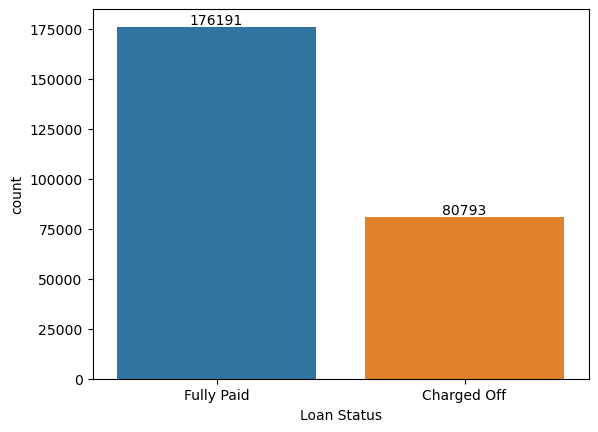

In [11]:
ax=sns.countplot(x=df["Loan Status"])
ax.bar_label(ax.containers[0]);

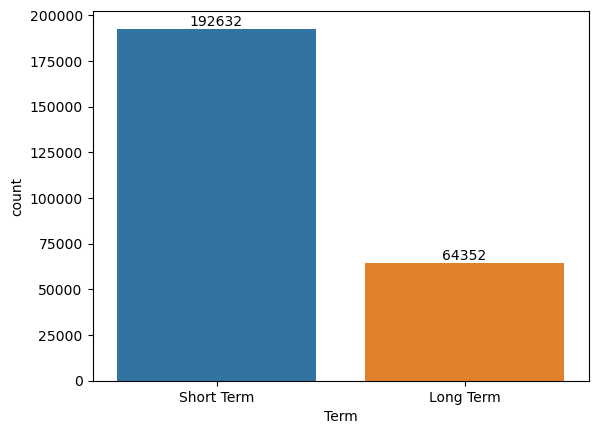

In [12]:
ax=sns.countplot(x=df["Term"])
ax.bar_label(ax.containers[0]);

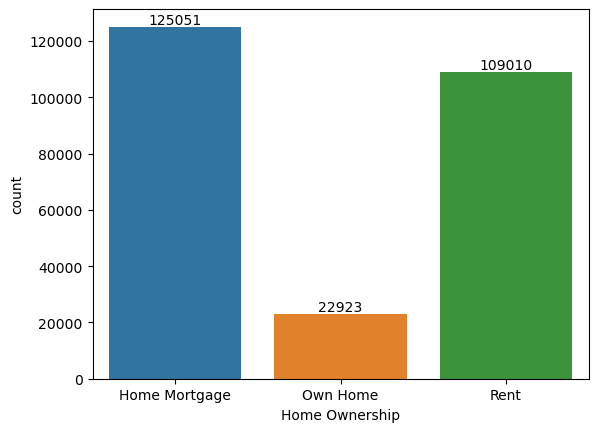

In [13]:
df['Home Ownership'].replace('HaveMortgage', 'Home Mortgage', inplace=True)
ax=sns.countplot(x=df["Home Ownership"])
ax.bar_label(ax.containers[0]);

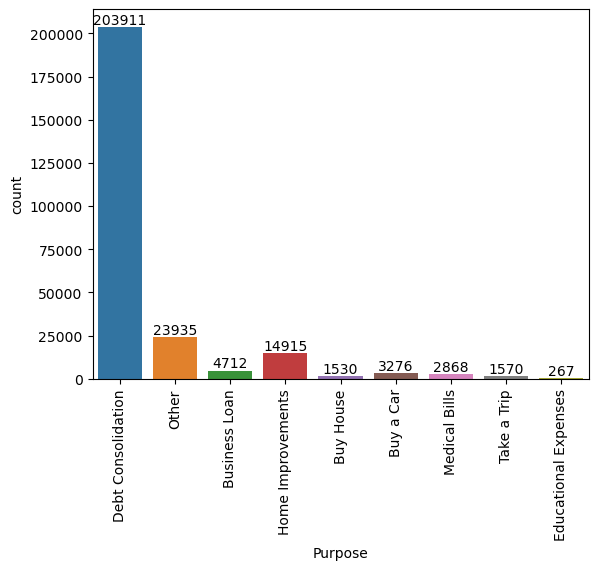

In [14]:
df['Purpose'].replace('other', 'Other', inplace=True)
ax=sns.countplot(x=df["Purpose"])
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0]);

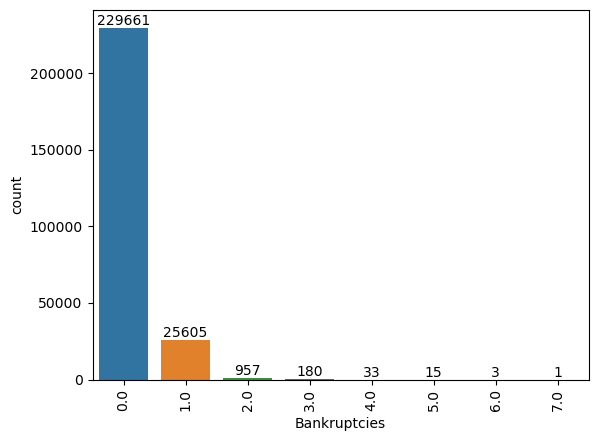

In [15]:
ax=sns.countplot(x=df["Bankruptcies"])
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0]);

In [16]:
group1 = df[(df['Credit Score'] >= 0) & (df['Credit Score'] <= 650)]
group2 = df[(df['Credit Score'] > 651) & (df['Credit Score'] <= 750)]
group3 = df[(df['Credit Score'] >= 751) & (df['Credit Score'] <= 850)]
group4 = df[(df['Credit Score'] >= 851) & (df['Credit Score'] <= 950)]
group5 = df[(df['Credit Score'] > 951) & (df['Credit Score'] <= 10000)]


In [17]:
group1_count = group1.shape[0]
group2_count = group2.shape[0]
group3_count = group3.shape[0]
group4_count = group4.shape[0]
group5_count = group5.shape[0]



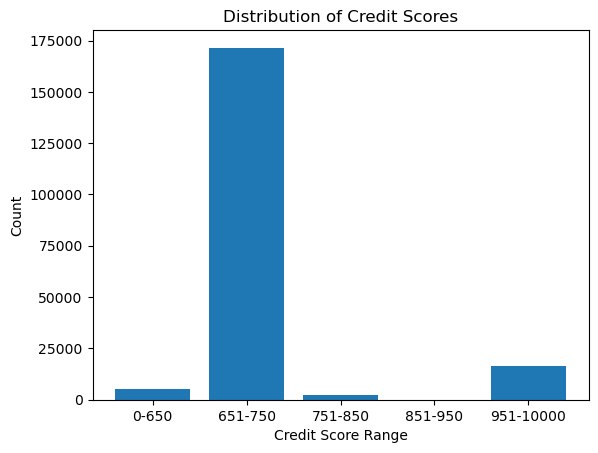

In [18]:
import matplotlib.pyplot as plt

groups = ['0-650','651-750', '751-850','851-950', '951-10000']
counts = [group1_count, group2_count, group3_count,group4_count,group5_count]

plt.bar(groups, counts)
plt.xlabel('Credit Score Range')
plt.ylabel('Count')
plt.title('Distribution of Credit Scores')
plt.show()


### Bankruptcy değerindeki null değerlerin handle edilmesi

In [19]:
df["Bankruptcies"].value_counts()

0.00    229661
1.00     25605
2.00       957
3.00       180
4.00        33
5.00        15
6.00         3
7.00         1
Name: Bankruptcies, dtype: int64

In [20]:
df['Bankruptcies'] = np.where((df['Credit Score'] <= 650) & (df['Bankruptcies'].isnull()), 1,
                            np.where((df['Credit Score'] > 650) & (df['Bankruptcies'].isnull()), 0, df['Bankruptcies']))


In [21]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       116
Tax Liens                           23
dtype: int64

### değişkenleri dummy değerine dönüştürme

In [22]:
dummy_df = pd.get_dummies(df["Loan Status"], prefix="Loan Status", drop_first=True)

df = pd.concat([df, dummy_df], axis=1)

In [23]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status_Fully Paid
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.00,10+ years,Home Mortgage,33694.00,Debt Consolidation,$584.03,12.30,41.00,10,0,6760,16056,0.00,0.00,1
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.00,4 years,Home Mortgage,42269.00,Other,"$1,106.04",26.30,NaN,17,0,6262,19149,0.00,0.00,1
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.00,10+ years,Home Mortgage,90126.00,Debt Consolidation,"$1,321.85",28.80,NaN,5,0,20967,28335,0.00,0.00,1
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.00,10+ years,Own Home,38072.00,Debt Consolidation,$751.92,26.20,NaN,9,0,22529,43915,0.00,0.00,1
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.00,4 years,Rent,50025.00,Debt Consolidation,$355.18,11.50,NaN,12,0,17391,37081,0.00,0.00,1


In [24]:
dummy_df = pd.get_dummies(df["Term"], prefix="Term", drop_first=True)

df = pd.concat([df, dummy_df], axis=1)

In [25]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status_Fully Paid,Term_Short Term
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.00,10+ years,Home Mortgage,33694.00,Debt Consolidation,$584.03,12.30,41.00,10,0,6760,16056,0.00,0.00,1,1
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.00,4 years,Home Mortgage,42269.00,Other,"$1,106.04",26.30,NaN,17,0,6262,19149,0.00,0.00,1,1
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.00,10+ years,Home Mortgage,90126.00,Debt Consolidation,"$1,321.85",28.80,NaN,5,0,20967,28335,0.00,0.00,1,1
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.00,10+ years,Own Home,38072.00,Debt Consolidation,$751.92,26.20,NaN,9,0,22529,43915,0.00,0.00,1,1
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.00,4 years,Rent,50025.00,Debt Consolidation,$355.18,11.50,NaN,12,0,17391,37081,0.00,0.00,1,1


In [26]:
dummy_df = pd.get_dummies(df["Purpose"], prefix="Purpose", drop_first=True)

df = pd.concat([df, dummy_df], axis=1)

In [27]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status_Fully Paid,Term_Short Term,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.00,10+ years,Home Mortgage,33694.00,Debt Consolidation,$584.03,12.30,41.00,10,0,6760,16056,0.00,0.00,1,1,0,0,1,0,0,0,0,0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.00,4 years,Home Mortgage,42269.00,Other,"$1,106.04",26.30,NaN,17,0,6262,19149,0.00,0.00,1,1,0,0,0,0,0,0,1,0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.00,10+ years,Home Mortgage,90126.00,Debt Consolidation,"$1,321.85",28.80,NaN,5,0,20967,28335,0.00,0.00,1,1,0,0,1,0,0,0,0,0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.00,10+ years,Own Home,38072.00,Debt Consolidation,$751.92,26.20,NaN,9,0,22529,43915,0.00,0.00,1,1,0,0,1,0,0,0,0,0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.00,4 years,Rent,50025.00,Debt Consolidation,$355.18,11.50,NaN,12,0,17391,37081,0.00,0.00,1,1,0,0,1,0,0,0,0,0


In [28]:
dummy_df = pd.get_dummies(df["Home Ownership"], prefix="Home Ownership", drop_first=True)

df = pd.concat([df, dummy_df], axis=1)

In [29]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status_Fully Paid,Term_Short Term,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Home Ownership_Own Home,Home Ownership_Rent
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.00,10+ years,Home Mortgage,33694.00,Debt Consolidation,$584.03,12.30,41.00,10,0,6760,16056,0.00,0.00,1,1,0,0,1,0,0,0,0,0,0,0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.00,4 years,Home Mortgage,42269.00,Other,"$1,106.04",26.30,NaN,17,0,6262,19149,0.00,0.00,1,1,0,0,0,0,0,0,1,0,0,0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.00,10+ years,Home Mortgage,90126.00,Debt Consolidation,"$1,321.85",28.80,NaN,5,0,20967,28335,0.00,0.00,1,1,0,0,1,0,0,0,0,0,0,0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.00,10+ years,Own Home,38072.00,Debt Consolidation,$751.92,26.20,NaN,9,0,22529,43915,0.00,0.00,1,1,0,0,1,0,0,0,0,0,1,0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.00,4 years,Rent,50025.00,Debt Consolidation,$355.18,11.50,NaN,12,0,17391,37081,0.00,0.00,1,1,0,0,1,0,0,0,0,0,0,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [31]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       116
Tax Liens                           23
Loan Status_Fully Paid               0
Term_Short Term                      0
Purpose_Buy House                    0
Purpose_Buy a Car                    0
Purpose_Debt Consolidation           0
Purpose_Educational Expenses         0
Purpose_Home Improvements

In [32]:
df['Bankruptcies'] = np.where((df['Loan Status_Fully Paid'] <= 650) & (df['Bankruptcies'].isnull()), 1,
                            np.where((df['Loan Status_Fully Paid'] > 650) & (df['Bankruptcies'].isnull()), 0, df['Bankruptcies']))


In [33]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                         0
Tax Liens                           23
Loan Status_Fully Paid               0
Term_Short Term                      0
Purpose_Buy House                    0
Purpose_Buy a Car                    0
Purpose_Debt Consolidation           0
Purpose_Educational Expenses         0
Purpose_Home Improvements

In [34]:
df["Tax Liens"].value_counts()

0.00     252322
1.00       3276
2.00        872
3.00        247
4.00        124
5.00         61
6.00         30
9.00         10
8.00          8
7.00          6
10.00         3
11.00         2
Name: Tax Liens, dtype: int64

In [35]:
df['Tax Liens'] = np.where((df['Bankruptcies'] <= 650) & (df['Tax Liens'].isnull()), 1,
                            np.where((df['Bankruptcies'] > 650) & (df['Tax Liens'].isnull()), 0, df['Tax Liens']))

In [36]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                         0
Tax Liens                            0
Loan Status_Fully Paid               0
Term_Short Term                      0
Purpose_Buy House                    0
Purpose_Buy a Car                    0
Purpose_Debt Consolidation           0
Purpose_Educational Expenses         0
Purpose_Home Improvements

In [37]:
df["Months since last delinquent"].value_counts()

12.00     2224
14.00     2196
15.00     2189
8.00      2164
9.00      2127
          ... 
122.00       1
98.00        1
143.00       1
140.00       1
119.00       1
Name: Months since last delinquent, Length: 131, dtype: int64

In [38]:
df['Months since last delinquent'] = df['Months since last delinquent'].fillna(0)

In [39]:
df.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    61676
Years in current job            11476
Home Ownership                      0
Annual Income                   61676
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent        0
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                        0
Tax Liens                           0
Loan Status_Fully Paid              0
Term_Short Term                     0
Purpose_Buy House                   0
Purpose_Buy a Car                   0
Purpose_Debt Consolidation          0
Purpose_Educational Expenses        0
Purpose_Home Improvements           0
Purpose_Medi

In [40]:
df['Monthly Debt'] = df['Monthly Debt'].str.lstrip('$')
df['Monthly Debt'] = df['Monthly Debt'].str.replace(',', '') #bu kolonu objectten floata cevirdim 
#bazı satırlarda hem virgül hem nokta vardı onu regule ettim
df['Monthly Debt'] = df['Monthly Debt'].astype(float)


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  float64
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  256984 non-nul

In [42]:
df = df.replace('#VALUE!', 0)
df['Maximum Open Credit'] = df['Maximum Open Credit'].astype(float)


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  float64
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  256984 non-nul

In [44]:
df["Years in current job"].value_counts()

10+ years    78896
2 years      23462
< 1 year     21012
3 years      20659
5 years      17864
1 year       16746
4 years      16166
6 years      14597
7 years      13968
8 years      12206
9 years       9932
Name: Years in current job, dtype: int64

In [45]:
df = df.replace('< 1 year', 0)
df['Years in current job'] = df['Years in current job'].str.replace(r'(\byear\b|\+|years)', '', regex=True)
df['Years in current job'] = df['Years in current job'].astype(float)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          224496 non-null  float64
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  float64
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  256984 non-nul

In [47]:
df.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    61676
Years in current job            32488
Home Ownership                      0
Annual Income                   61676
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent        0
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                        0
Tax Liens                           0
Loan Status_Fully Paid              0
Term_Short Term                     0
Purpose_Buy House                   0
Purpose_Buy a Car                   0
Purpose_Debt Consolidation          0
Purpose_Educational Expenses        0
Purpose_Home Improvements           0
Purpose_Medi

In [48]:
## annual ıncome predıctıon
y = df['Annual Income']

predict_column = 'Annual Income'

features = ["Loan Status_Fully Paid", "Current Loan Amount","Term_Short Term", "Monthly Debt",
        "Months since last delinquent", "Number of Credit Problems", "Current Credit Balance", 
         "Maximum Open Credit", "Bankruptcies","Home Ownership_Rent", "Home Ownership_Own Home"]

test_indices = df[df[predict_column].isnull()].index
test_df = df.loc[test_indices]

train_df = df.drop(test_indices)

x_train = train_df[features]
y_train = train_df[predict_column]

x_test = test_df[features]



In [49]:
x_train.shape,x_test.shape,y_train.shape

((195308, 11), (61676, 11), (195308,))

In [50]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
XGBC= XGBRegressor()
model=XGBC.fit(x_train,y_train)
pred=model.predict(x_test)

In [51]:
y_pred_xgb = model.predict(x_test)

In [52]:
df.loc[df['Annual Income'].isnull(), 'Annual Income'] = y_pred_xgb


In [53]:
#years ın current job prediction
y = df['Years in current job']

predict_column = 'Years in current job'

features = ["Annual Income","Loan Status_Fully Paid", "Current Loan Amount","Term_Short Term", "Monthly Debt",
        "Months since last delinquent", "Number of Credit Problems", "Current Credit Balance", 
         "Maximum Open Credit","Home Ownership_Rent", "Home Ownership_Own Home","Purpose_Buy House",
          "Purpose_Buy a Car", "Purpose_Educational Expenses"
           
           
           ]

test_indices = df[df[predict_column].isnull()].index
test_df = df.loc[test_indices]

train_df = df.drop(test_indices)

x_train = train_df[features]
y_train = train_df[predict_column]

x_test = test_df[features]

In [54]:
x_train.shape,x_test.shape,y_train.shape

((224496, 14), (32488, 14), (224496,))

In [55]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
XGBC= XGBRegressor()
model=XGBC.fit(x_train,y_train)
pred=model.predict(x_test)

In [56]:
y_pred_xgb = model.predict(x_test)

In [57]:
df.loc[df['Years in current job'].isnull(), 'Years in current job'] = y_pred_xgb


In [58]:
#credit score tahmini
y = df['Credit Score']

predict_column = 'Credit Score'

features = ["Annual Income","Loan Status_Fully Paid", "Current Loan Amount","Term_Short Term", "Monthly Debt",
        "Months since last delinquent", "Number of Credit Problems", "Current Credit Balance", 
         "Maximum Open Credit", "Years of Credit History","Number of Open Accounts","Bankruptcies", "Tax Liens"
           
           
           ]

test_indices = df[df[predict_column].isnull()].index
test_df = df.loc[test_indices]

train_df = df.drop(test_indices)

x_train = train_df[features]
y_train = train_df[predict_column]

x_test = test_df[features]

In [59]:
x_train.shape,x_test.shape,y_train.shape

((195308, 13), (61676, 13), (195308,))

In [60]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
XGBC= XGBRegressor()
model=XGBC.fit(x_train,y_train)
pred=model.predict(x_test)

In [61]:
y_pred_xgb = model.predict(x_test)

In [62]:
df.loc[df['Credit Score'].isnull(), 'Credit Score'] = y_pred_xgb


In [63]:
df.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
Loan Status_Fully Paid          0
Term_Short Term                 0
Purpose_Buy House               0
Purpose_Buy a Car               0
Purpose_Debt Consolidation      0
Purpose_Educational Expenses    0
Purpose_Home Improvements       0
Purpose_Medical Bills           0
Purpose_Other                   0
Purpose_Take a Trip             0
Home Ownership

In [64]:
# ASIL MODEL: DEFAULT TAHMİNİ CLASSIFICATION


x=df[["Annual Income", "Current Loan Amount","Term_Short Term","Credit Score", "Years in current job",
            "Home Ownership_Own Home","Home Ownership_Rent", "Purpose_Buy House", "Purpose_Buy a Car", 
            "Purpose_Debt Consolidation", "Purpose_Educational Expenses", "Purpose_Home Improvements", 
            "Purpose_Home Improvements", "Purpose_Medical Bills","Purpose_Other", "Purpose_Take a Trip",
            "Monthly Debt","Months since last delinquent", "Number of Credit Problems", "Current Credit Balance", 
         "Maximum Open Credit", "Years of Credit History","Number of Open Accounts","Bankruptcies", "Tax Liens"]]
y=df[["Loan Status_Fully Paid"]]

In [65]:
x_train, x_test,y_train,y_test=train_test_split(x,y, test_size=0.20, random_state=42)

In [66]:
x_train.shape, x_test.shape

((205587, 25), (51397, 25))

In [67]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
g=GaussianNB()
b=BernoulliNB()

In [68]:
g.fit(x,y)
b.fit(x,y)

BernoulliNB()

In [69]:
tahmin1=g.predict(x)
tahmin2=b.predict(x)

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [71]:
accuracy_score(tahmin1,y)

0.4525651402421941

In [72]:
confusion_matrix(tahmin1,y)

array([[ 80707, 140596],
       [    86,  35595]])

In [73]:
print(classification_report(tahmin1,y))

              precision    recall  f1-score   support

           0       1.00      0.36      0.53    221303
           1       0.20      1.00      0.34     35681

    accuracy                           0.45    256984
   macro avg       0.60      0.68      0.44    256984
weighted avg       0.89      0.45      0.51    256984



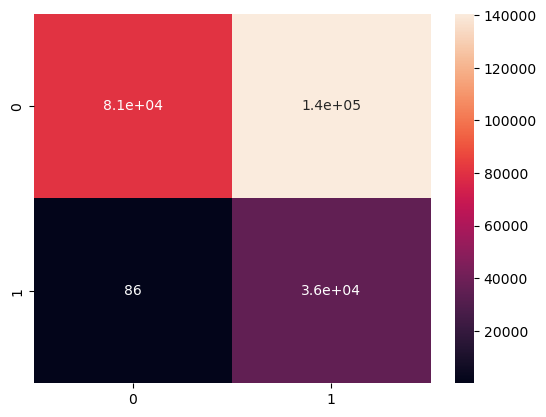

In [74]:
sns.heatmap(confusion_matrix(tahmin1,y),annot=True);

In [75]:
accuracy_score(tahmin2,y)

0.6884086168788718

<Axes: >

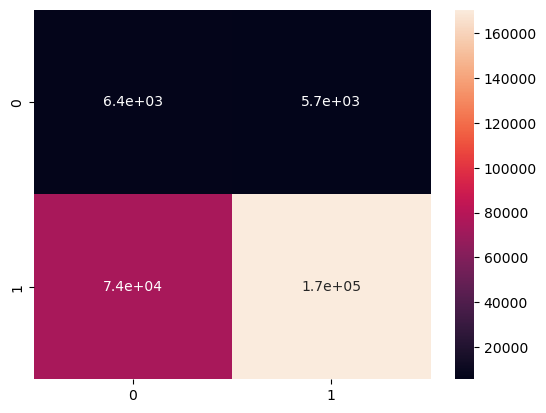

In [76]:
sns.heatmap(confusion_matrix(tahmin2,y),annot=True)

In [77]:
confusion_matrix(tahmin2,y)

array([[  6429,   5710],
       [ 74364, 170481]])

In [78]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()

In [79]:
k.fit(x,y)

KNeighborsClassifier()

In [80]:
tahmin3=k.predict(x)

In [81]:
accuracy_score(tahmin3,y)

0.8493641627494318

In [82]:
confusion_matrix(tahmin3,y)

array([[ 53062,  10980],
       [ 27731, 165211]])

In [83]:
print(classification_report(tahmin3,y))

              precision    recall  f1-score   support

           0       0.66      0.83      0.73     64042
           1       0.94      0.86      0.90    192942

    accuracy                           0.85    256984
   macro avg       0.80      0.84      0.81    256984
weighted avg       0.87      0.85      0.85    256984



In [84]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()

In [85]:
l.fit(x,y)

LogisticRegression()

In [86]:
tahmin4=l.predict(x)

In [87]:
confusion_matrix(tahmin4,y)

array([[ 41616,  11103],
       [ 39177, 165088]])

In [88]:
accuracy_score(tahmin4,y)

0.8043457958472123

In [89]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()

In [90]:
d.fit(x,y)

DecisionTreeClassifier()

In [91]:
tahmin5=d.predict(x)

In [92]:
accuracy_score(tahmin5,y)

1.0

In [93]:
confusion_matrix(tahmin5,y)

array([[ 80793,      0],
       [     0, 176191]])

In [94]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()

In [95]:
r.fit(x,y)

RandomForestClassifier()

In [96]:
tahmin6=r.predict(x)

In [97]:
accuracy_score(tahmin6,y)

1.0

In [98]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

In [99]:
gb.fit(x,y)

GradientBoostingClassifier()

In [100]:
tahmin7=gb.predict(x)

In [101]:
accuracy_score(tahmin7,y)

0.8337056003486598

In [102]:
confusion_matrix(tahmin7,y)

array([[ 41870,   3812],
       [ 38923, 172379]])